### Import Libraries

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

### Dilation

[[1 1]
 [1 1]]


/tmp/ipykernel_33856/3200196691.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img_dilation, cmap='gray')


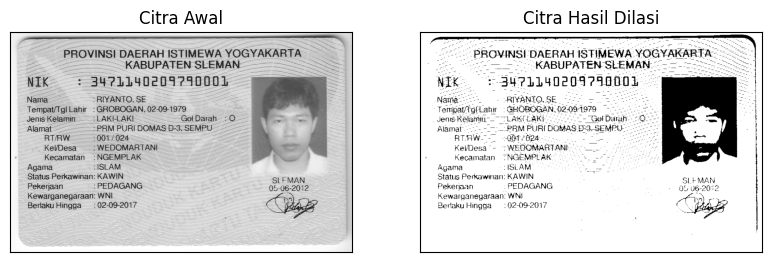

In [16]:
img_dilation = cv2.imread('./images/KTP_More/ktp.png', 0)
gamma_image = np.zeros(img_dilation.shape, dtype=np.uint8)

for y in range(img_dilation.shape[0]):
	for x in range(img_dilation.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_dilation[y,x]/255.0) ** (2/1), 0, 255)
  
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((2,2),np.uint8)
output_image = cv2.dilate(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(img_dilation, cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

### Erotion

[[1 1 1]
 [1 1 1]
 [1 1 1]]


/tmp/ipykernel_33856/1466723192.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img_dilation, cmap='gray')


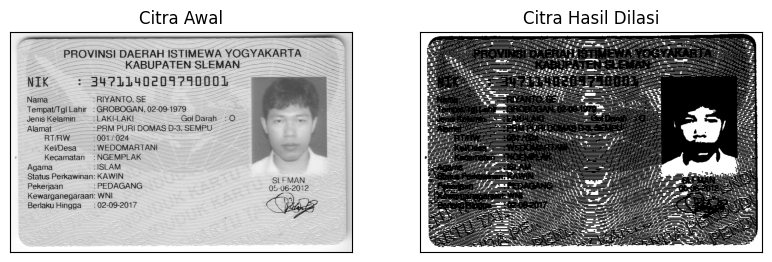

In [18]:
img_dilation = cv2.imread('./images/KTP_More/ktp.png', 0)
gamma_image = np.zeros(img_dilation.shape, dtype=np.uint8)

for y in range(img_dilation.shape[0]):
	for x in range(img_dilation.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_dilation[y,x]/255.0) ** (2/1), 0, 255)
  
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
output_image = cv2.erode(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(img_dilation, cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

### Opening

In [21]:
def image_dilation(F, w):
	# F: input image
	# w: structuring element
	# return: dilated output image
	p, q = F.shape

	output_image = np.zeros((p,q), dtype=np.uint8)
 
	# Generate SED
	SED = np.ones((w,w), dtype=np.uint8)
	c = int((w-1)/2)
 
	# Dilation
	for i in range(c, p-c):
		for j in range(c, q-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)
 
	return output_image


In [22]:
def image_erotion(F, k):
	# F: input image
	# k: structuring element
	# return: eroded output image
	height, width = F.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SEE
	SEE = np.ones((k,k), dtype=np.uint8)
	c = int((k-1)/2)

	# Erosion
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SEE
			output_image[i,j] = np.min(product)

	return output_image


In [23]:
def image_opening(F, w):
	# F: input image
	# w: structuring element
	# return: opened output image
	eroded_image = image_erotion(F, w)
	opened_image = image_dilation(eroded_image, w)
	return opened_image

/tmp/ipykernel_33856/2993364526.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


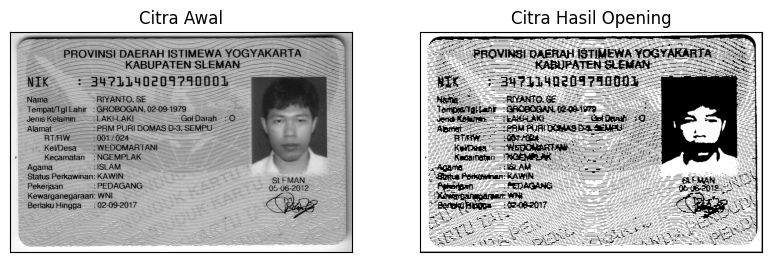

In [24]:
img_opening = cv2.imread('./images/KTP_More/ktp.png', 0)
gamma_image = np.zeros(img_opening.shape, img_opening.dtype)

for y in range(img_opening.shape[0]):
	for x in range(img_opening.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_opening[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

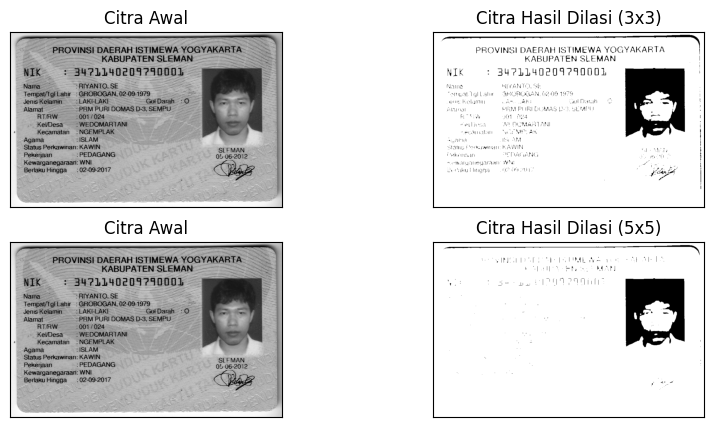

In [26]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,3),np.uint8)
kernel_5 = np.ones((5,5),np.uint8)
output_image_3 = cv2.dilate(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.dilate(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

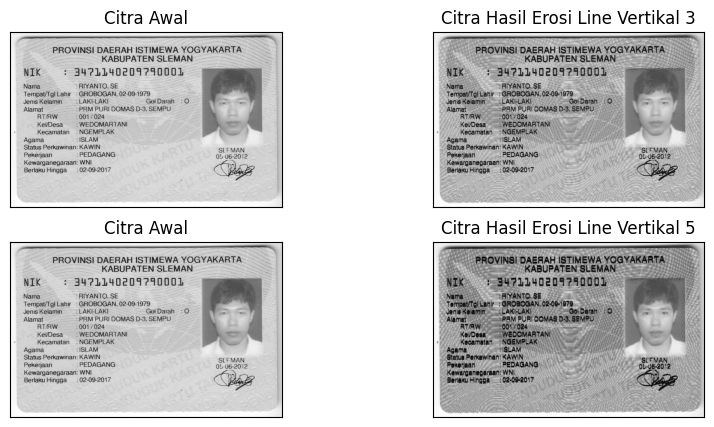

In [27]:
image = cv2.imread('./images/KTP_More/ktp.png', 0)

vertical_line_3 = np.ones((3,1), dtype=np.uint8)
vertical_line_5 = np.ones((5,1), dtype=np.uint8)

eroded_img_3 = cv2.erode(image, vertical_line_3, iterations=1)
eroded_img_5 = cv2.erode(image, vertical_line_5, iterations=1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(eroded_img_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(eroded_img_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi Line Vertikal 5')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

### Blackhat

/tmp/ipykernel_33856/98843280.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(image, cmap='gray')


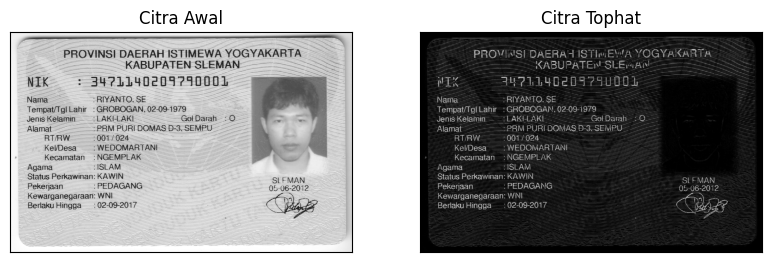

In [42]:
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(image, cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat, cmap='gray')
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()

### Tophat

/tmp/ipykernel_33856/433396443.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(image, cmap='gray')


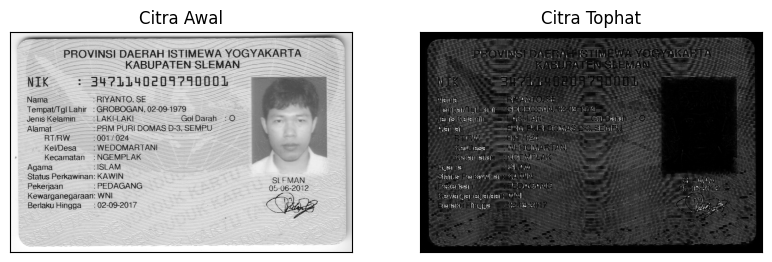

In [31]:
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(image, cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat, cmap='gray')
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()

### Extract

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
